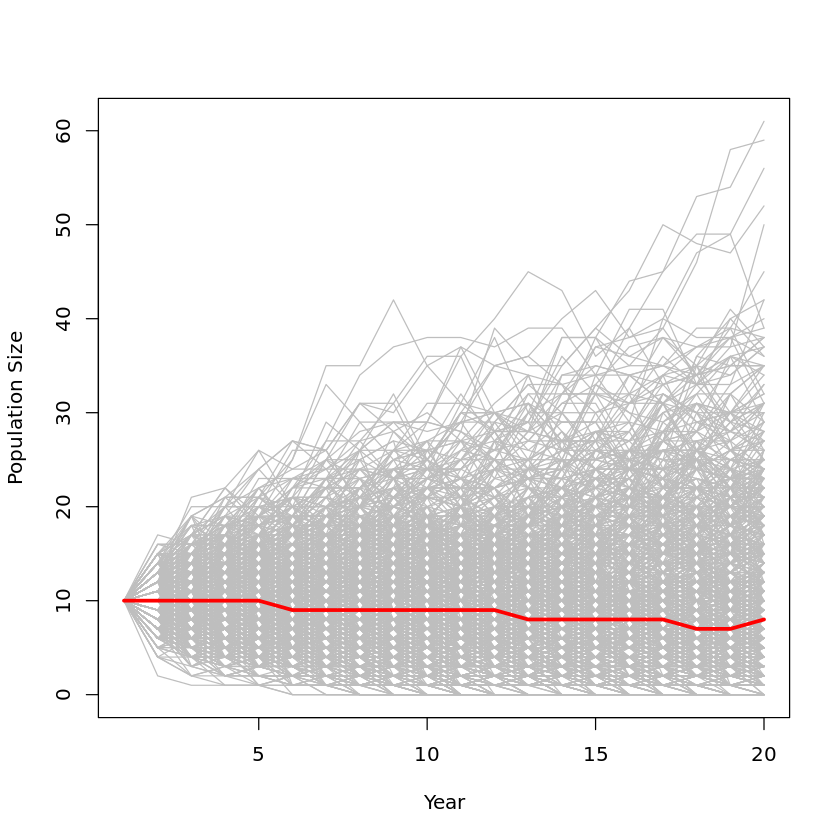

In [5]:
N <- 10

dat = data.frame(matrix(NA,nrow=20, ncol=1000))
dat[1,] <- N

for(i in seq(from=1, to=1000, by=1)){
  d1 <- dat[,i]
  
    for (i in seq(from=2, to=20, by = 1)){
      d1[i] <- (rbinom(1,d1[i-1],0.5)) + (rbinom(1,d1[i-1],0.5))}
  
  dat = cbind(dat,d1)
  
}

dat1 <- dat[,1001:2000]


MAX <- max(apply(dat1,1,max))
Extinction <- data.frame(Extinction = rowSums(dat1==0)/1000, Year = seq(1:20))
dat1$MED <- apply(dat1,1,median)
dat1$Year <- seq(1:20)


#Simulation Plot
plot(dat1[,1]~Year, data=dat1, col="gray", ylab="Population Size", ylim=c(0,MAX), typ="l")
for(i in seq(1:1000)){
  lines(dat1[,i]~Year, data=dat1, col="gray")
}
lines(MED~Year, data=dat1, col="red", lwd=3)


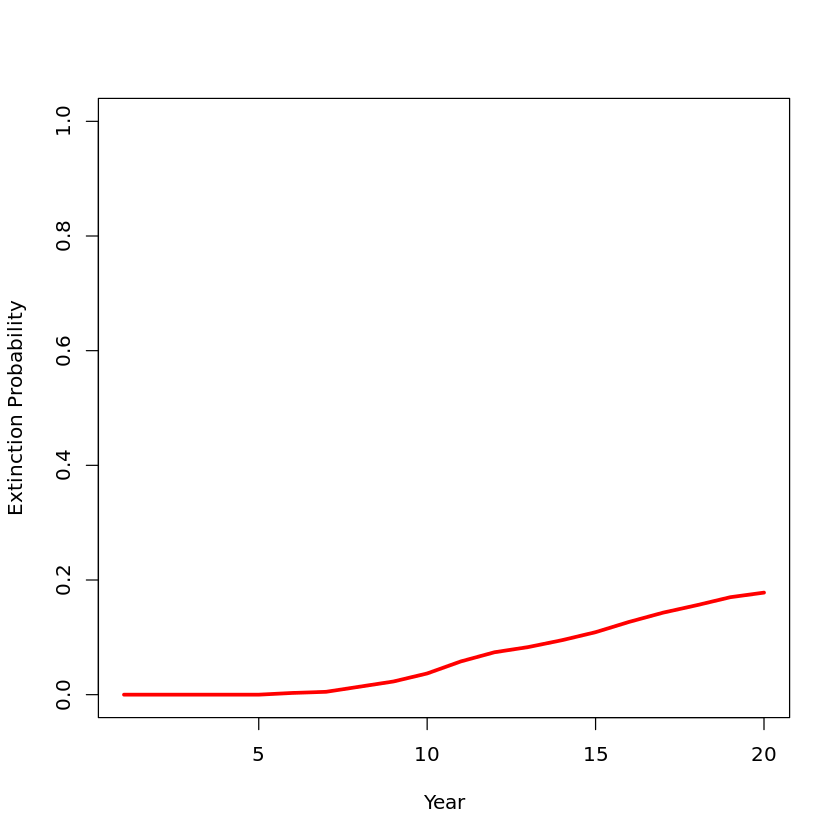

In [7]:
#Extinction Probability Plot
plot(Extinction~Year, typ="l", col="red", lwd=3, ylim=c(0,1), ylab="Extinction Probability", data=Extinction)